In [40]:
import pylab, math, random
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.collections import LineCollection
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

**Stationary entropy**

Stationary gaze entropy estimates uncertainty in overall spatial dispersion of fixations across a visual scene.

State Spaces = 11.25 * 11.25 = 126.5625
Maximum H = 6.9837061926593496
H = 5.777170430137165
Normalised H = 0.8272356068200023


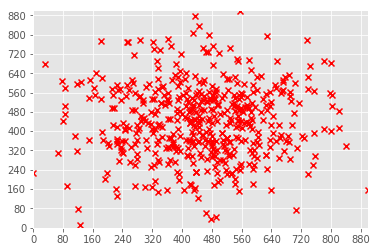

In [47]:
# generate simulation of fixations with pseudo-gaussian distribution for simplicity and calculate entropy
# to see how it varies with number of fixations, their distribution and number of discrete state spaces generated

random.seed(99999) #set seed for reproducibility

N = 500 #observed number of fixations (adjust as necessary)
minn = 900 #limit for gaussian - just to make ploting easier
maxn = 0 #limit for gaussian
mean = minn/2
sd = mean/3

#pseudo-gaussian distribution due to the minn maxn parameters set
x = [min(minn, max(maxn, random.gauss(mean, sd))) for i in range(N)]
y = [min(minn, max(maxn, random.gauss(mean, sd))) for i in range(N)]
xy = np.vstack((x,y))
s = minn #state spaces (maximum coordinate value)
sby = 80 #interval for state space division

#create dataframe with fixation coordinates and state spaces (i.e. x_range)
xydf=pd.DataFrame(xy.reshape(N,2), index = np.arange(N), columns=('x','y'))
xydf['x_range'] = pd.cut(xydf.x, np.arange(0, s, sby), right=False)
xydf['y_range'] = pd.cut(xydf.y, np.arange(0, s, sby), right=False)

#plot the coordinates and set grid limit according to the state spaces generated
plt.scatter(xydf.x, xydf.y, marker='x', c='red')
plt.axis([0, s, 0, s])
plt.xticks((np.arange(0, s, sby)))
plt.yticks((np.arange(0, s, sby)))

#generate probablity distributions for each state space to calculate entropy
xydf=xydf.groupby(['x_range','y_range']).size().reset_index().rename(columns={0:'count'})
xydf['p']=xydf['count']/xydf['count'].sum()

#multiply each p by its log
p_by_log = list()
for i in np.array(xydf['p']):
    p_by_log.append(math.log2(i)*i)
xydf['p*log(p)']= p_by_log

#list the number of state spaces, maximum entropy, observed entropy and normalised entropy
#NOTE: coordinates outside the defined state spaces are not included in the entropy calculation
print('State Spaces =',s/sby, '*', s/sby, '=', s/sby*s/sby)
print('Maximum H =' ,math.log2(s/sby*s/sby))
print('H =' ,abs(xydf['p*log(p)'].sum()))
print('Normalised H =' ,abs(xydf['p*log(p)'].sum()/math.log2(s/sby*s/sby)))